In [1]:
#Prediction of NasDaq 100, is it accurate no, because the stockmarket is rather unpredictable, but it can show trends in the stock market

import numpy as np
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\chris\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.
C:\Users\chris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\chris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\chris\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' 

In [2]:
#stock data from Yahoo
df = web.DataReader('^NDX', data_source='yahoo', start='1985-01-01', end='2020-05-06')
#show gathered data
df  

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1985-10-01,112.160004,110.565002,110.620003,112.139999,153160000,112.139999
1985-10-02,112.540001,110.779999,112.139999,110.824997,164640000,110.824997
1985-10-03,111.184998,110.120003,110.839996,110.870003,147300000,110.870003
1985-10-04,110.870003,109.855003,110.870003,110.074997,147900000,110.074997
1985-10-07,110.135002,108.175003,110.074997,108.199997,128640000,108.199997
...,...,...,...,...,...,...
2020-04-30,9023.030273,8920.419922,9005.240234,9000.509766,4316380000,9000.509766
2020-05-01,8887.580078,8688.580078,8791.879883,8718.179688,3722520000,8718.179688
2020-05-04,8840.330078,8665.400391,8683.940430,8834.110352,3422150000,8834.110352


In [3]:
#Get the number of rows and columns in the data set
df.shape

(8721, 6)

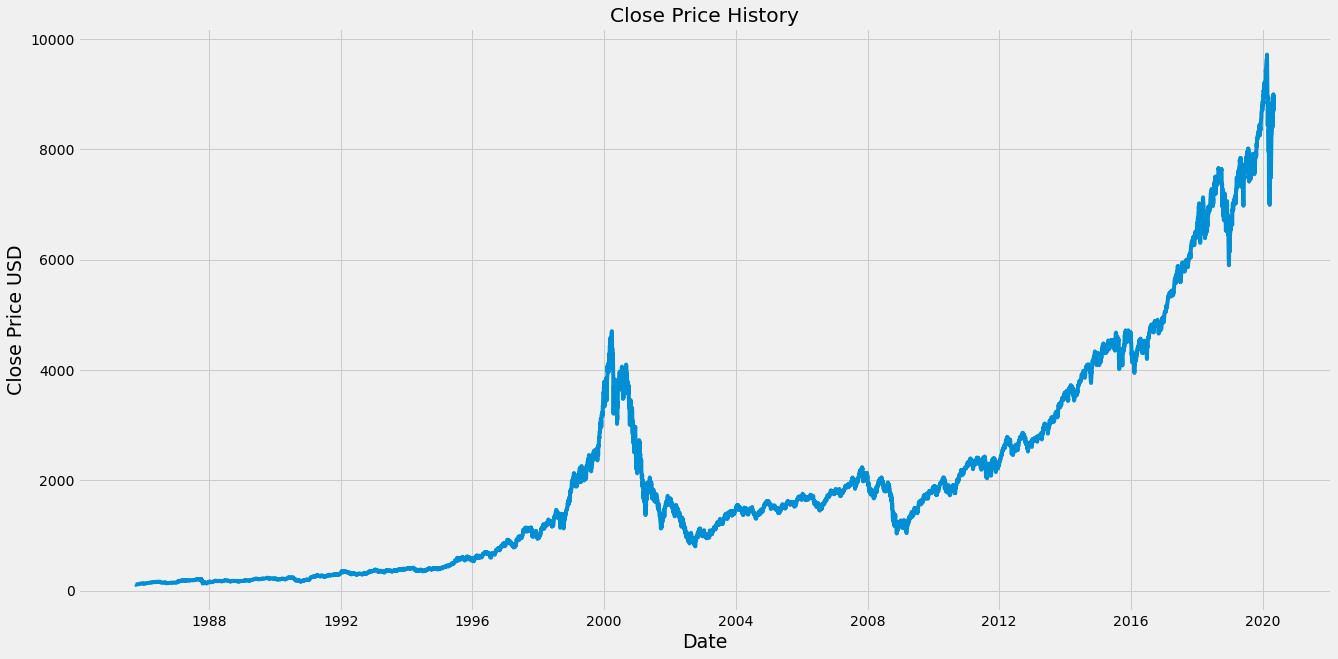

In [28]:
#Visualize the closing price historical data
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=19)
plt.ylabel('Close Price USD', fontsize=19)
plt.show()      

In [5]:
#Create a new dataframe with for the 'Close column'
data= df.filter(['Close'])
#Convert dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

6977

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.18125081e-04],
       [3.81310557e-04],
       [3.85993017e-04],
       ...,
       [9.07962999e-01],
       [9.18003998e-01],
       [9.23647221e-01]])

In [7]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print('---------------------------New dataset-----------------------------')

[array([0.00051813, 0.00038131, 0.00038599, 0.00030328, 0.0001082 ,
       0.        , 0.00015294, 0.00023669, 0.00040472, 0.00062685,
       0.00064714, 0.00074442, 0.00078863, 0.00074494, 0.00067835,
       0.00075742, 0.00082245, 0.00086614, 0.00070228, 0.00069291,
       0.0008573 , 0.00089579, 0.00086562, 0.00094834, 0.00092389,
       0.0009655 , 0.0010633 , 0.00108827, 0.0012589 , 0.00137751,
       0.00152524, 0.0014571 , 0.00152681, 0.00156218, 0.00153929,
       0.00160328, 0.00156478, 0.00171148, 0.00174893, 0.00166206,
       0.00174685, 0.00193621, 0.00196638, 0.00187534, 0.00188003,
       0.00216198, 0.00221608, 0.0020595 , 0.00211464, 0.00216562,
       0.00229099, 0.00235185, 0.00259739, 0.00264785, 0.00253601,
       0.00249491, 0.00257658, 0.00261143, 0.00245173, 0.00237942])]
[0.00241219659605146]
---------------------------New dataset-----------------------------
[array([0.00051813, 0.00038131, 0.00038599, 0.00030328, 0.0001082 ,
       0.        , 0.00015294, 0.00

In [8]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(6917, 60, 1)

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train model
model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
6917/6917 [==============================] - 265s 38ms/step - loss: 1.2831e-04


In [13]:
#Create the testing data set
#Create a new array containing scaled values from index
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [14]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [15]:
#Reset the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

293.1543803644031

C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


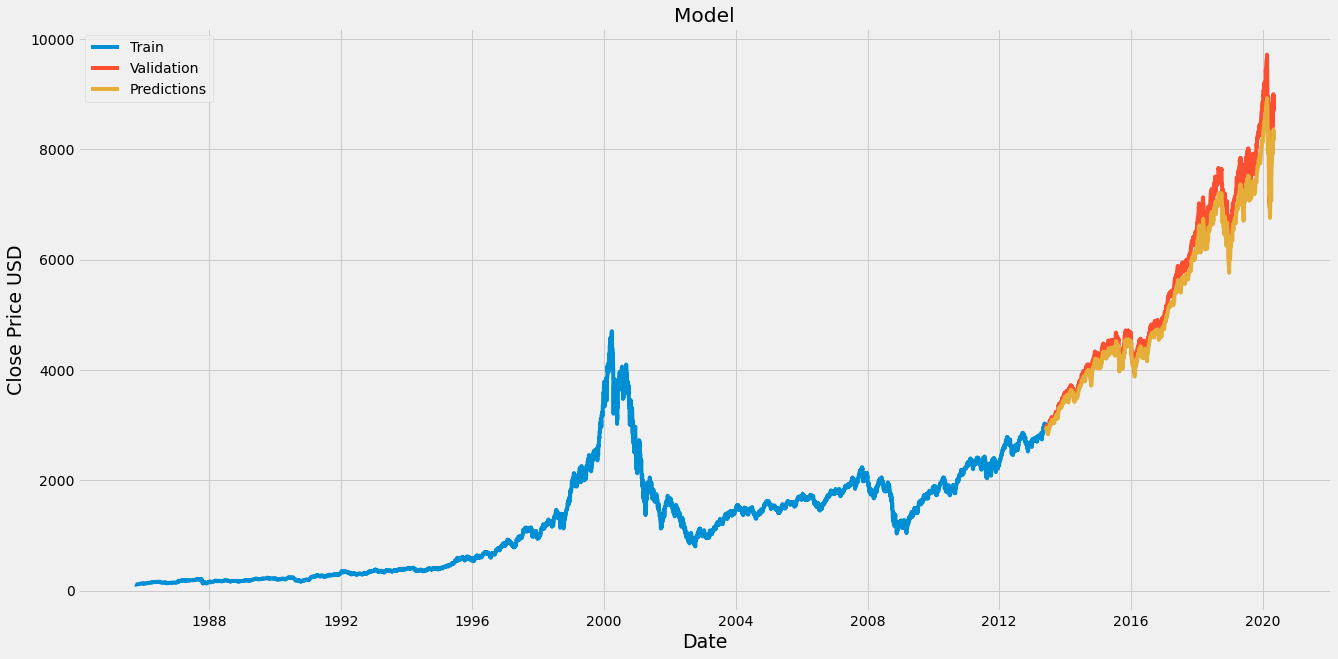

In [29]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize=19)
plt.ylabel('Close Price USD', fontsize=19)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc ='upper left')
plt.show()

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2013-06-04,2973.689941,2957.491943
2013-06-05,2937.139893,2949.404053
2013-06-06,2950.300049,2928.700195
2013-06-07,2990.870117,2920.816162
2013-06-10,2990.489990,2937.005371
...,...,...
2020-04-30,9000.509766,8272.198242
2020-05-01,8718.179688,8357.185547
2020-05-04,8834.110352,8233.270508


In [20]:
#Get quote
security_quote = web.DataReader('^NDX', data_source='yahoo', start='1985-01-01', end='2020-05-07')
#Create new dataframe
new_df = security_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to a new array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create empty list
X_test = [] #find better variable name
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#reshape data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
predicted_price = model.predict(X_test)
#undo the scaling
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

[[8320.885]]


In [21]:
#Get quote
security_quote2 = web.DataReader('^NDX', data_source='yahoo', start='2020-05-07', end='2020-05-07')
print(security_quote2['Close'])

Date
2020-05-06    8984.858398
Name: Close, dtype: float64
